In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df=pd.read_csv('Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


#### Finding: The annual income for people who worked in the profession for more than 10 years, normally have lesser income. Although, for artists and doctors it is not the case.

Healthcare


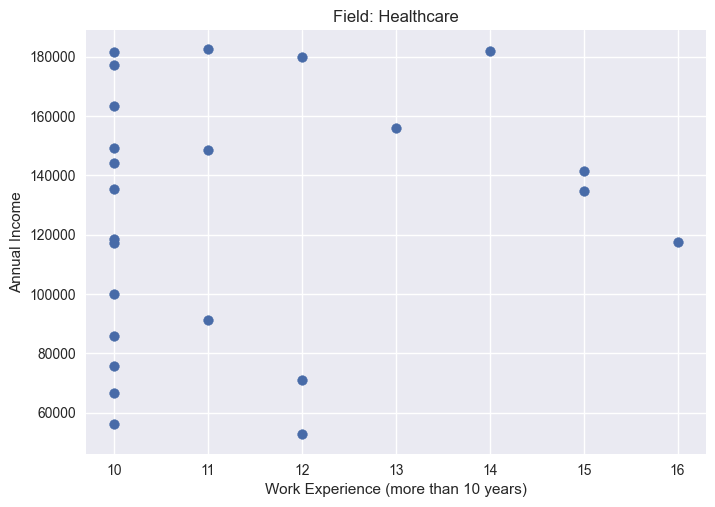

Engineer


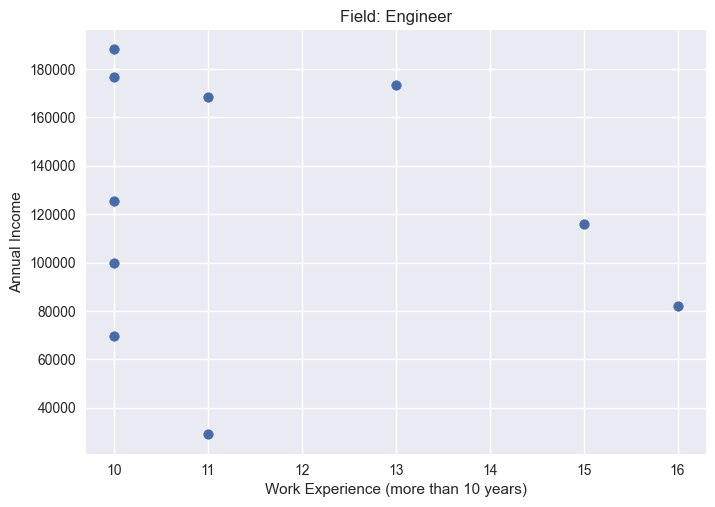

Lawyer


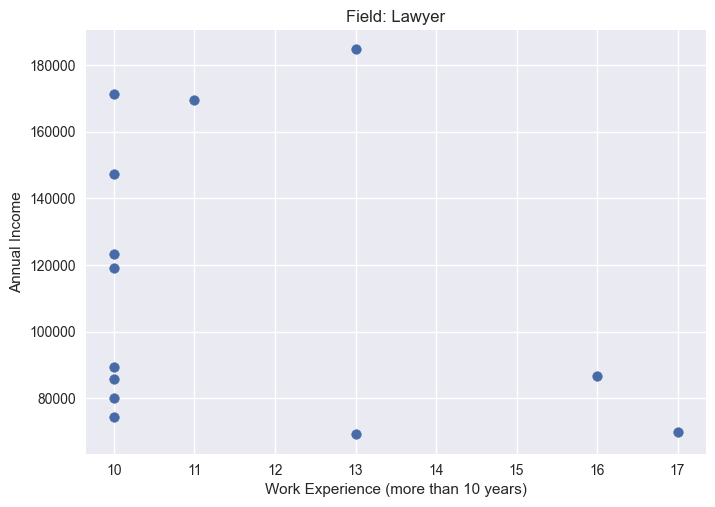

Entertainment


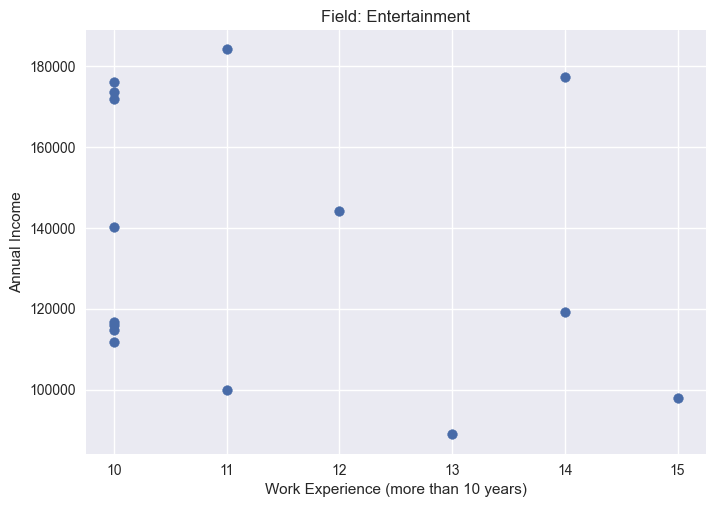

Artist


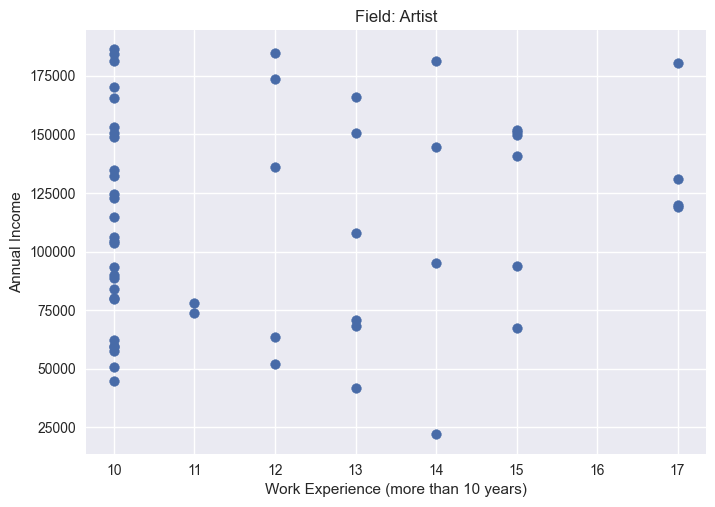

Executive


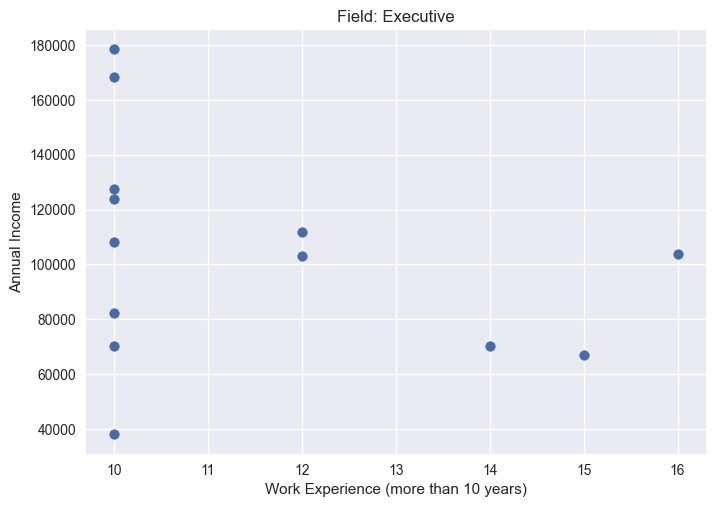

Doctor


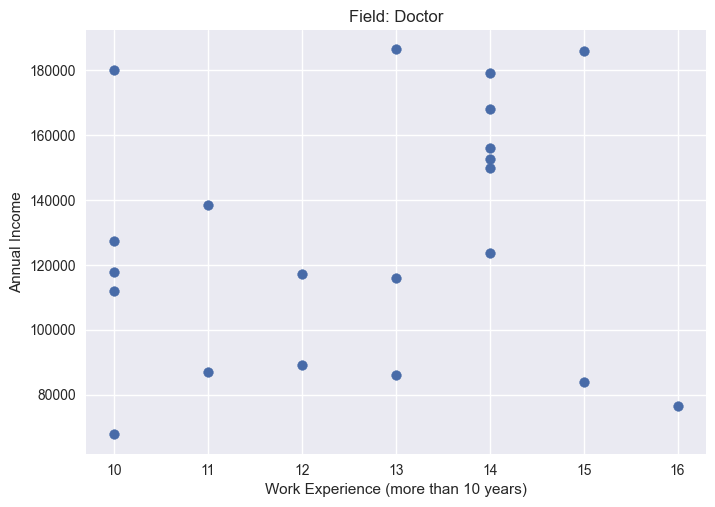

Homemaker


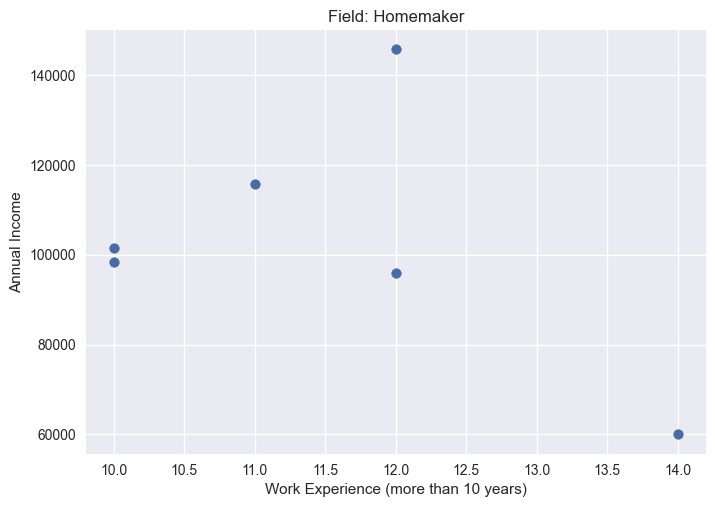

Marketing


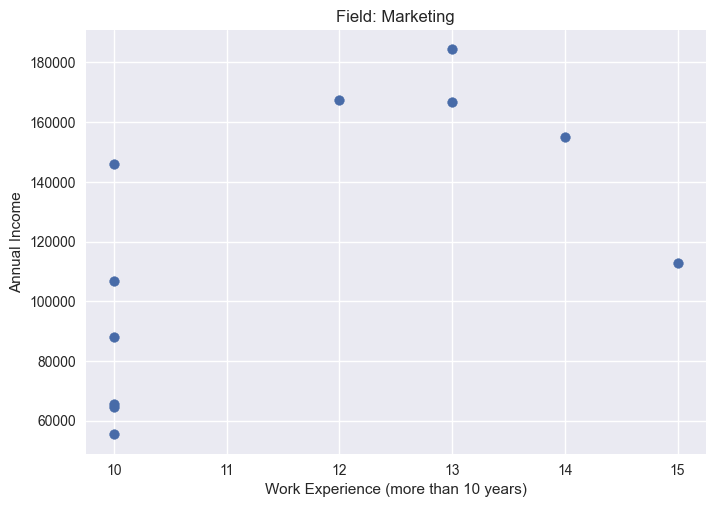

In [74]:
profession=[]
for i in list(df["Profession"].unique()):
    if not pd.isnull(i):    
        profession.append(i)

dataframes=[]

for i in profession:
    print(i)
    x=df[(df["Profession"]==i) & (df["Work Experience"]>9)]["Work Experience"]
    y=df[(df["Profession"]==i) & (df["Work Experience"]>9)]["Annual Income ($)"]
    plt.scatter(x,y,color="#486BA8")
    plt.style.use("seaborn-v0_8")
    plt.grid(True)
    plt.title(f"Field: {i}")
    plt.xlabel("Work Experience (more than 10 years)")
    plt.ylabel("Annual Income")
    plt.show()





#### Finding: For people less than 10 years, a consistency among all the years can be seen in profession like Doctors and artists that make them more stable thgan others based on annual income throughout time.
#### First 0-2 years are really good for everyone as data is distributed across all incomes

Healthcare


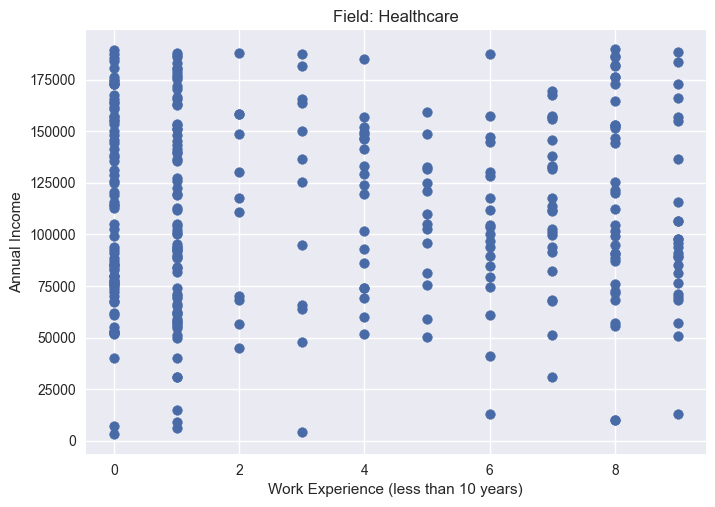

Engineer


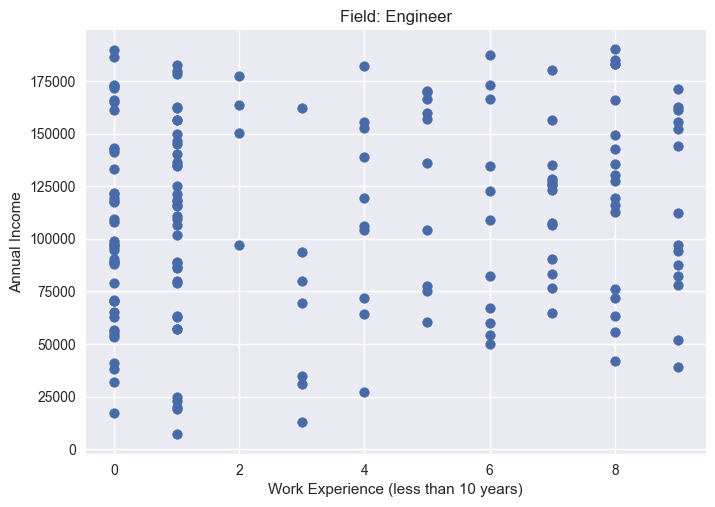

Lawyer


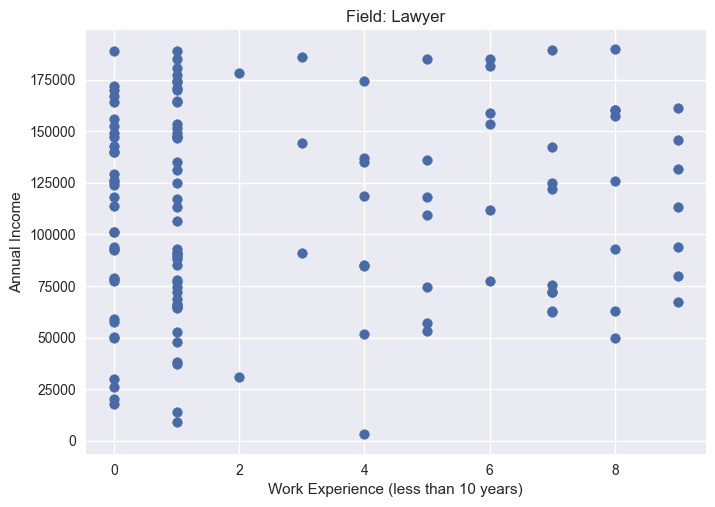

Entertainment


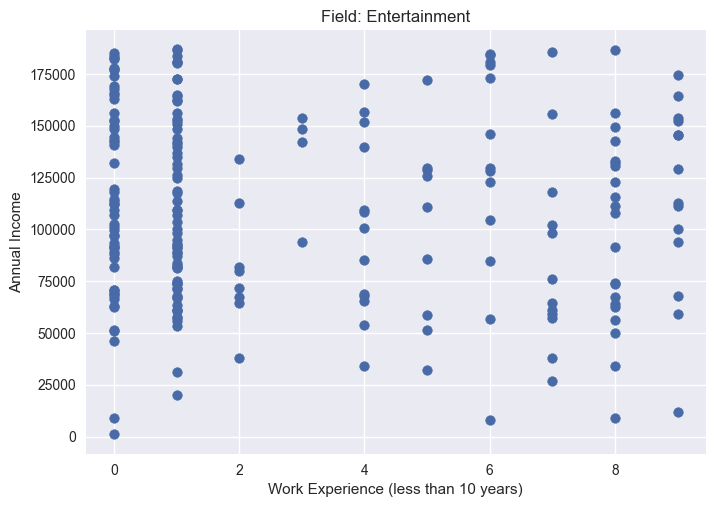

Artist


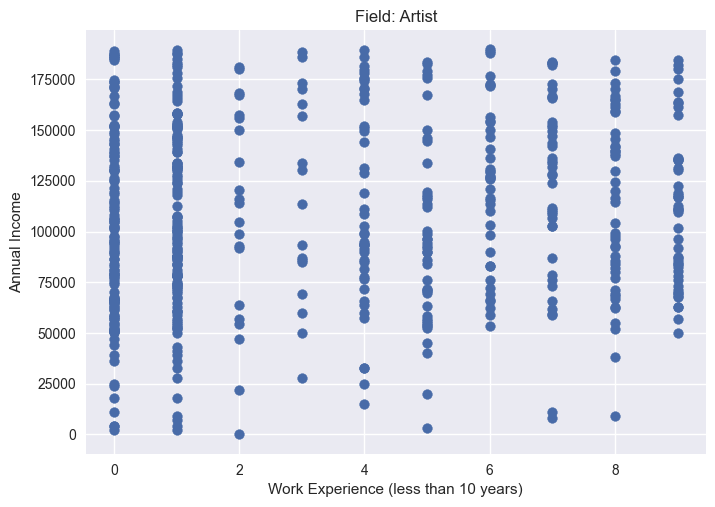

Executive


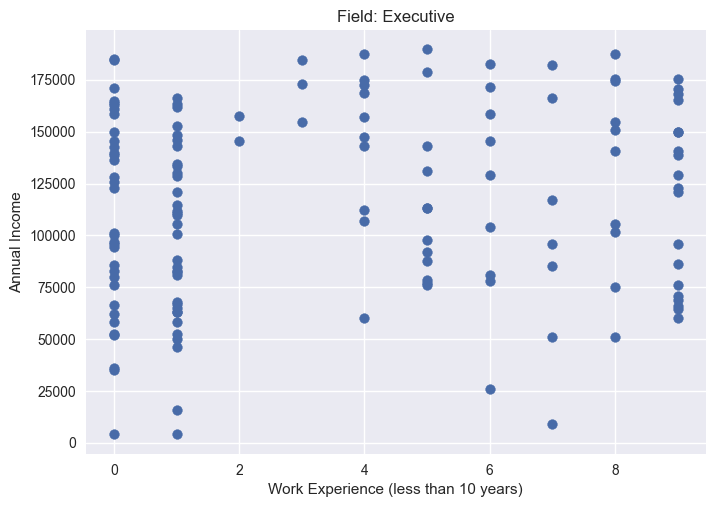

Doctor


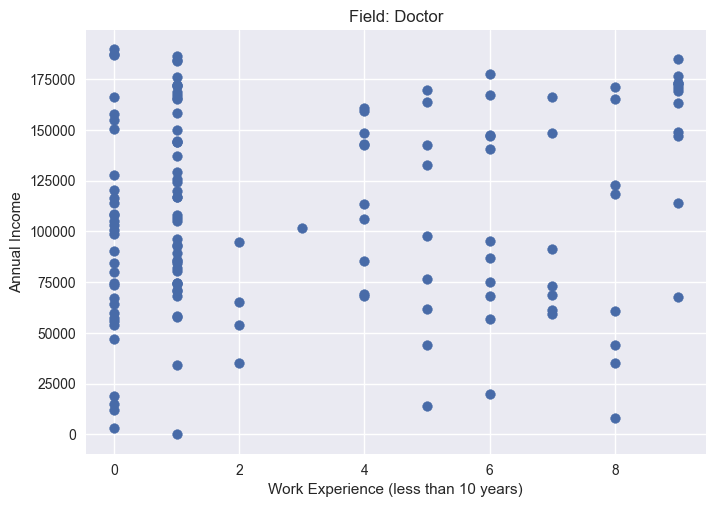

Homemaker


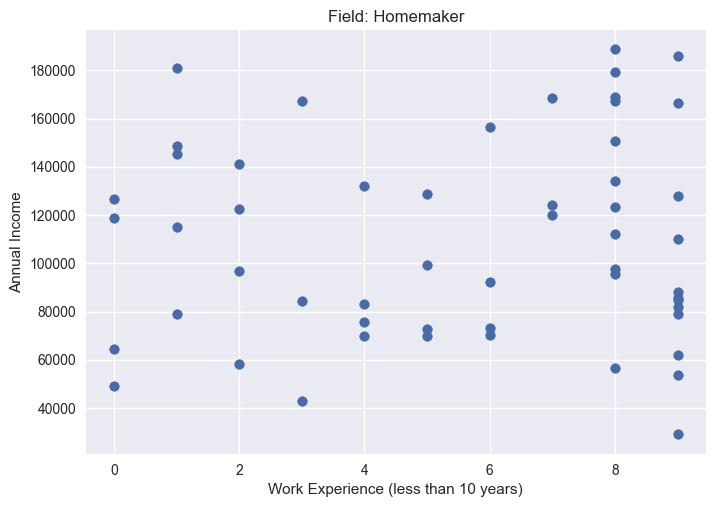

Marketing


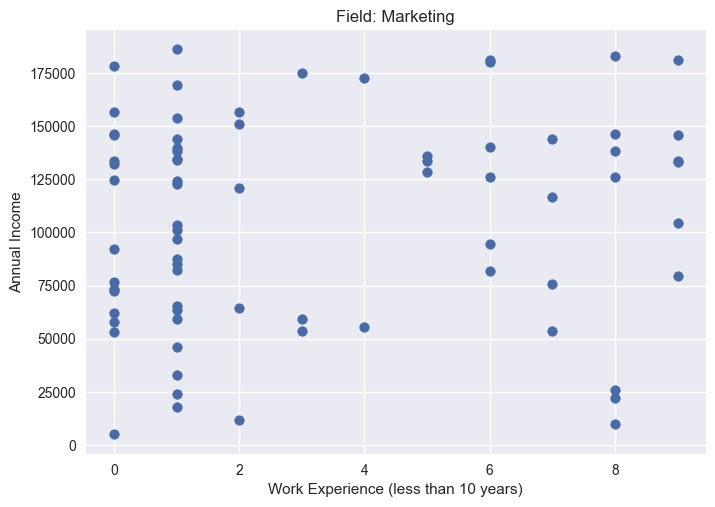

In [73]:
for i in profession:
    print(i)
    x=df[(df["Profession"]==i) & (df["Work Experience"]<10)]["Work Experience"]
    y=df[(df["Profession"]==i) & (df["Work Experience"]<10)]["Annual Income ($)"]
    plt.scatter(x,y,color="#486BA8")
    plt.style.use("seaborn-v0_8")
    plt.title(f"Field: {i}")
    plt.xlabel("Work Experience (less than 10 years)")
    plt.ylabel("Annual Income")
    plt.grid(True)
    plt.show()


#### Finding: The trend remains similar for both demographic

Healthcare


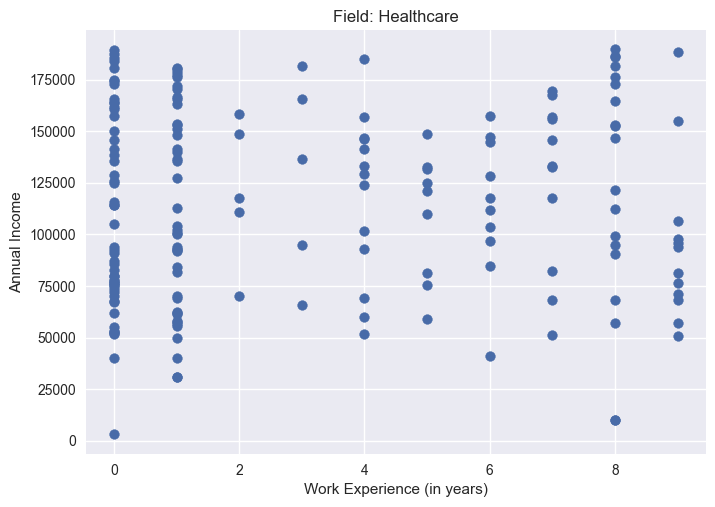

Engineer


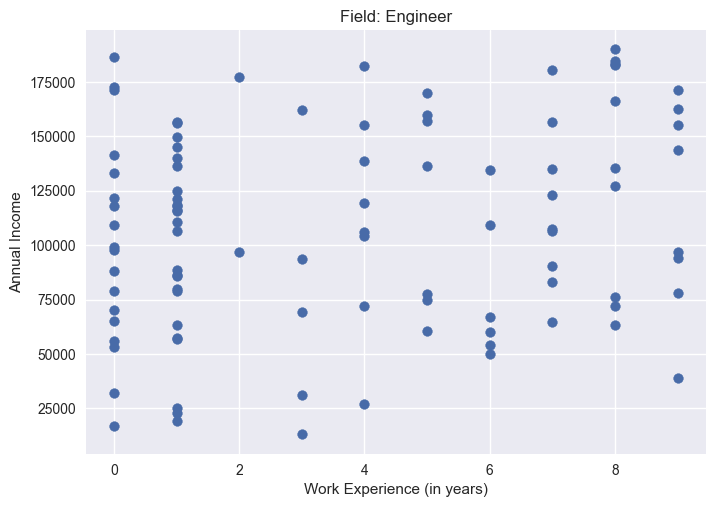

Lawyer


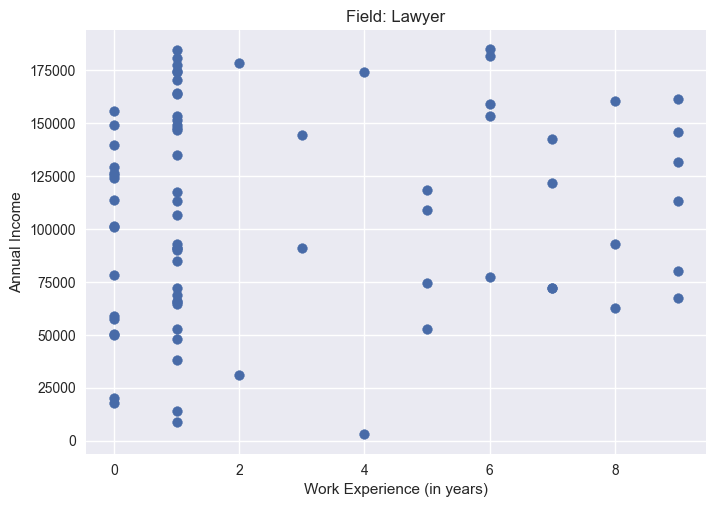

Entertainment


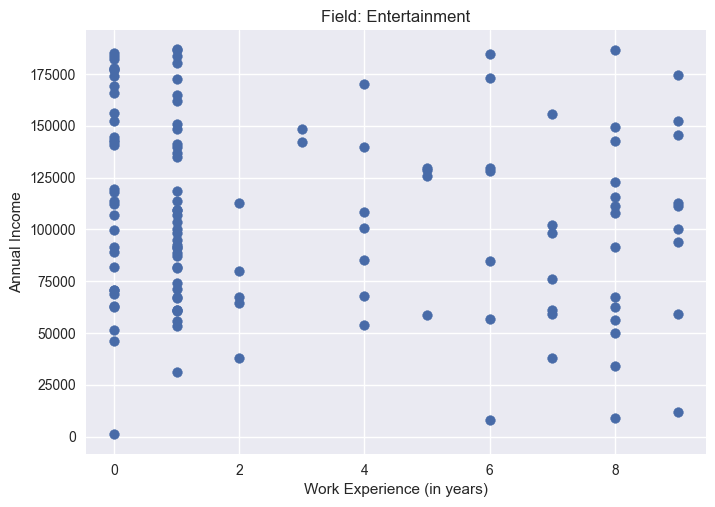

Artist


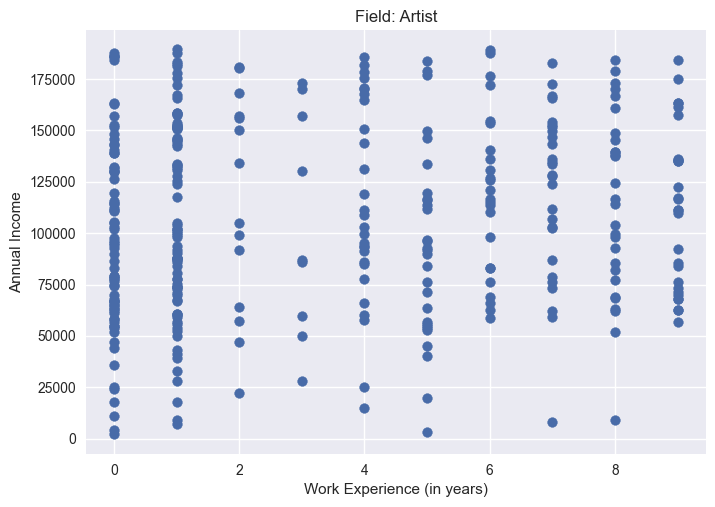

Executive


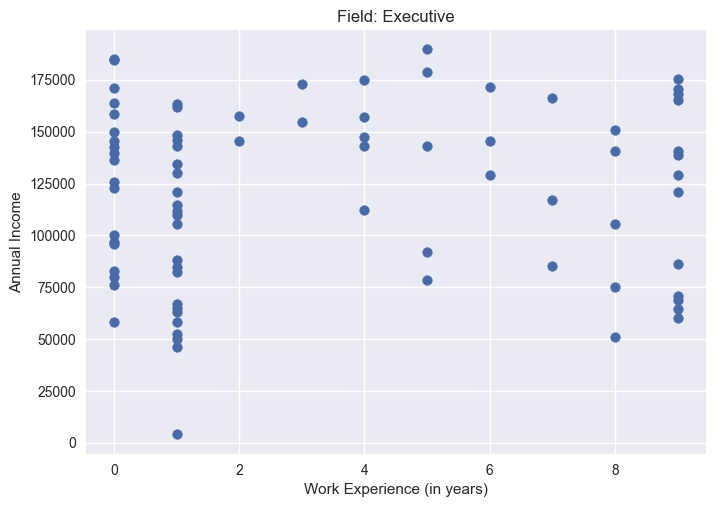

Doctor


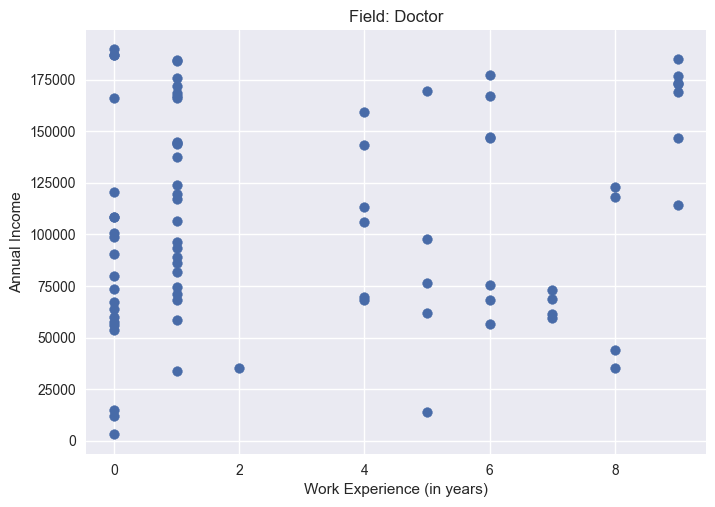

Homemaker


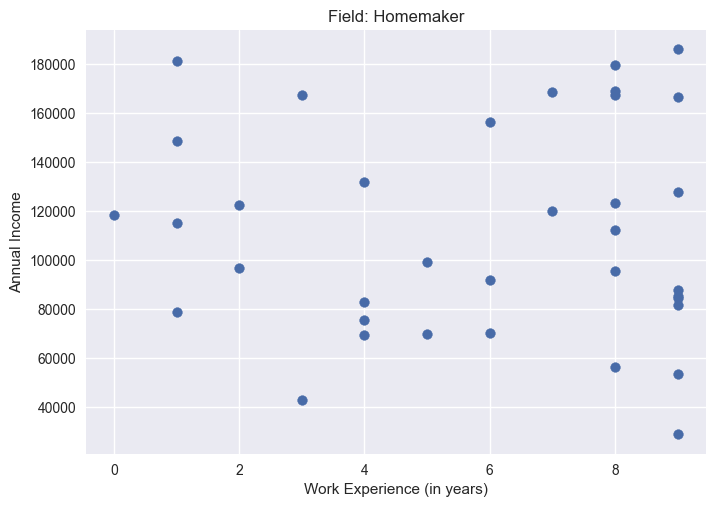

Marketing


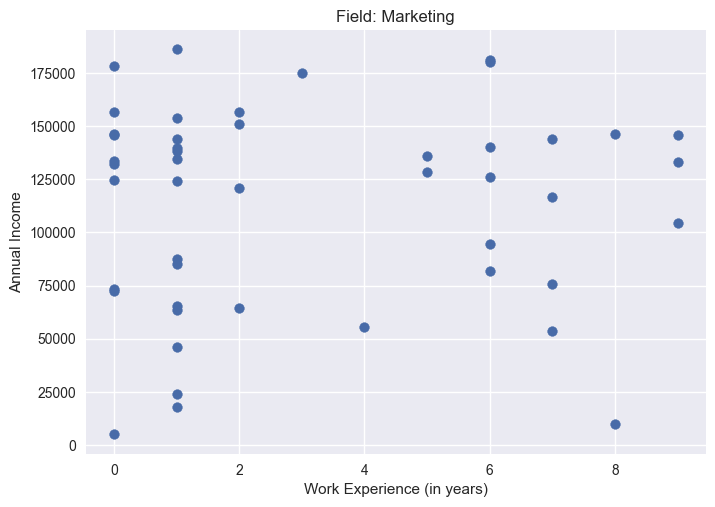

In [72]:
for i in profession:
    print(i)
    x=df[(df["Profession"]==i) & (df["Work Experience"]<10) & (df["Gender"]=="Female")]["Work Experience"]
    y=df[(df["Profession"]==i) & (df["Work Experience"]<10) & (df["Gender"]=="Female")]["Annual Income ($)"]
    plt.scatter(x,y,color="#486BA8")
    plt.style.use("seaborn-v0_8")
    plt.title(f"Field: {i}")
    plt.xlabel("Work Experience (in years)")
    plt.ylabel("Annual Income")
    plt.grid(True)
    plt.show()

# Already checked with Male as the Gender and it gives similar results

#### Analysis of men and women in different fields

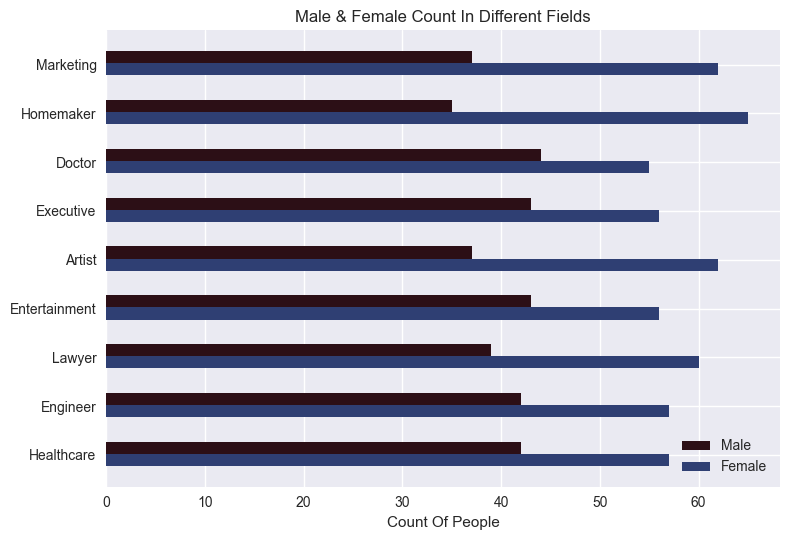

In [69]:
data1=[]
data2=[]
perc=[]
perc1=[]
for i in profession:
    data1.append(df[(df["Gender"]=="Female") & (df["Profession"]==i)].value_counts().sum())
    data2.append(df[(df["Gender"]=="Male") & (df["Profession"]==i)].value_counts().sum())
    calc=data1[-1]/(data1[-1]+data2[-1])
    calc=int(calc*100)
    perc.append(calc)
    calc1=data2[-1]/(data1[-1]+data2[-1])
    calc1=int(calc1*100)
    perc1.append(calc1)


y=np.arange(len(profession))
h=0.25

plt.barh(y+h, perc1, color="#2C0F16", height=h, label="Male")
plt.barh(y, perc, color="#2F3F73", height=h, label="Female")
plt.yticks(y+0.10,profession)
plt.legend()
plt.xlabel("Count Of People")
plt.title("Male & Female Count In Different Fields")
plt.tight_layout()
plt.show()


#### Finding: Family size has little to no affect on spending score

Healthcare


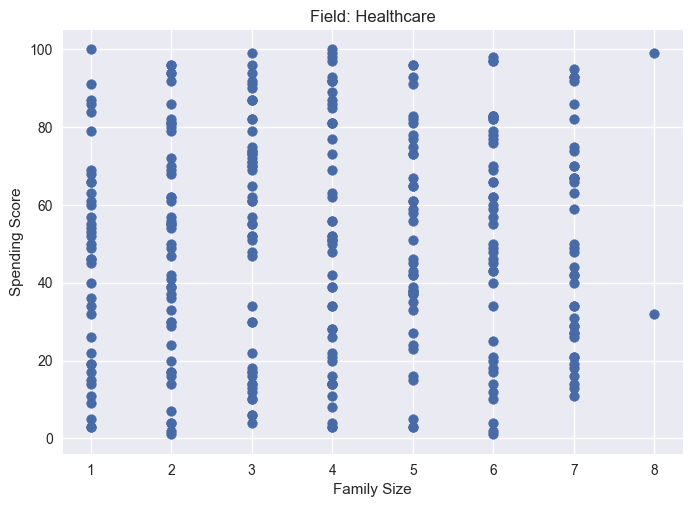

Engineer


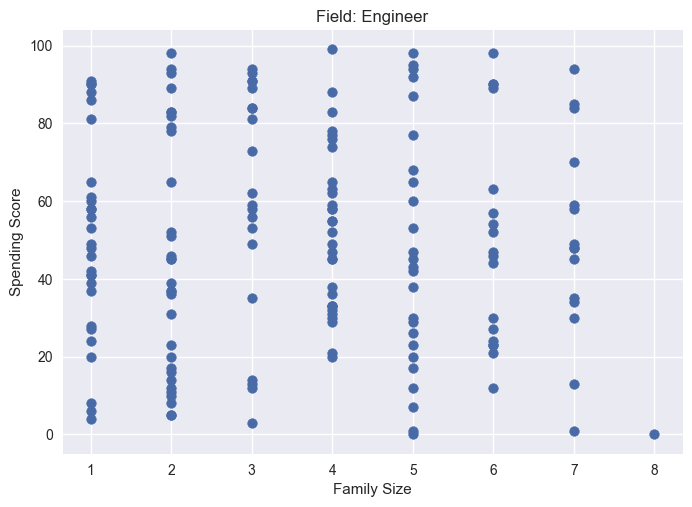

Lawyer


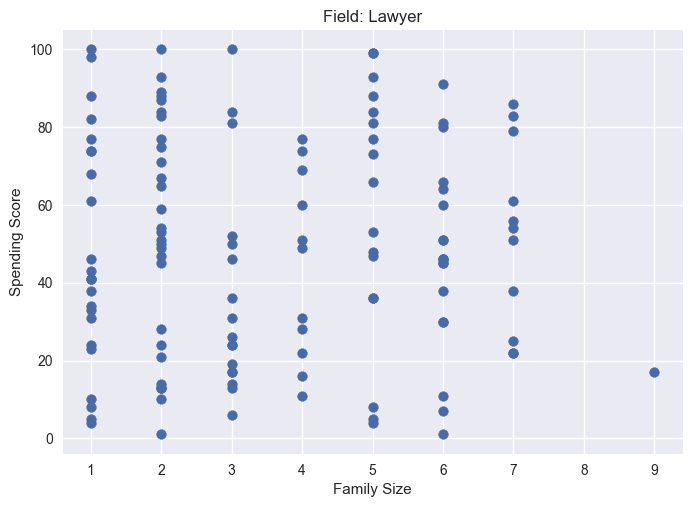

Entertainment


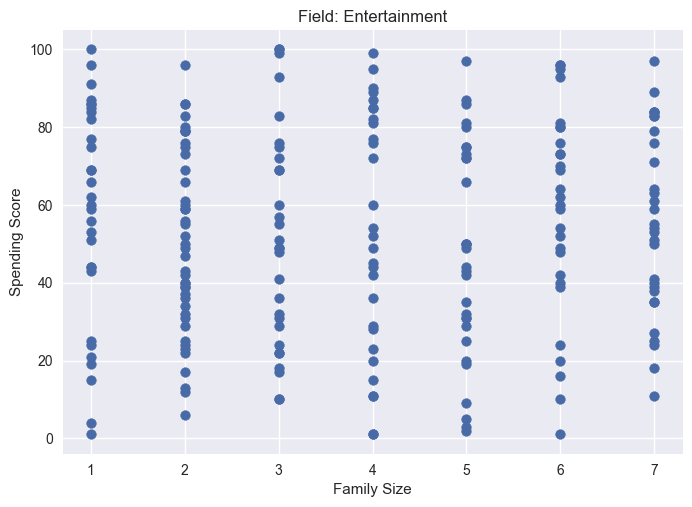

Artist


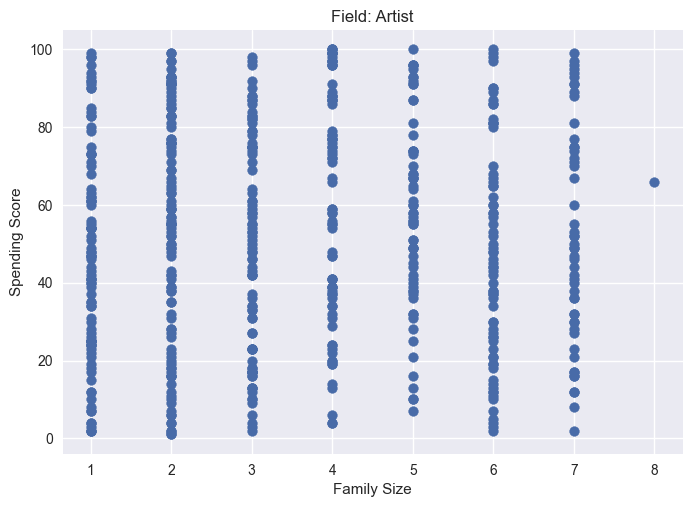

Executive


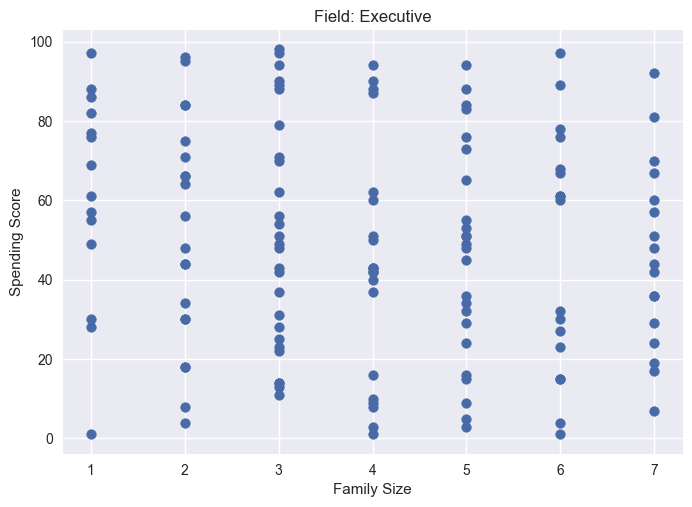

Doctor


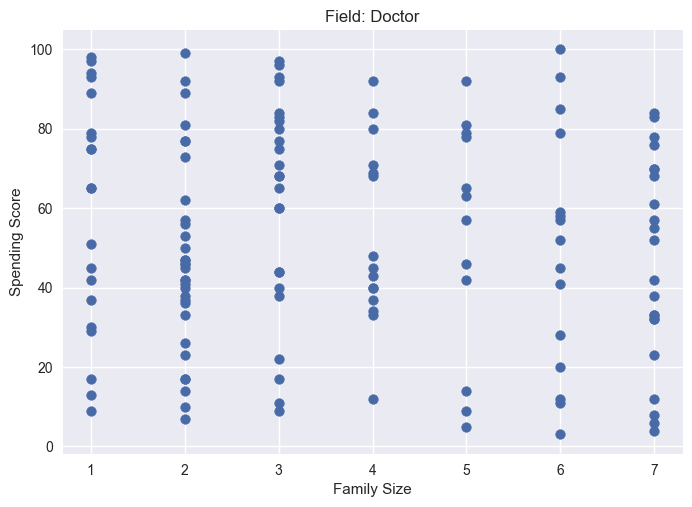

Homemaker


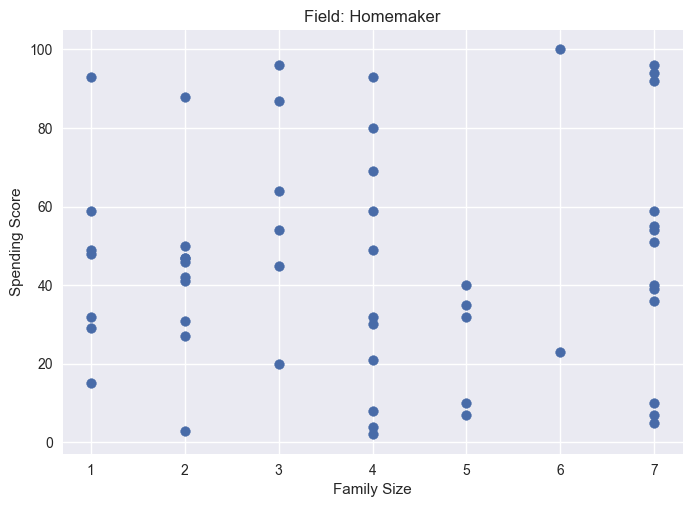

Marketing


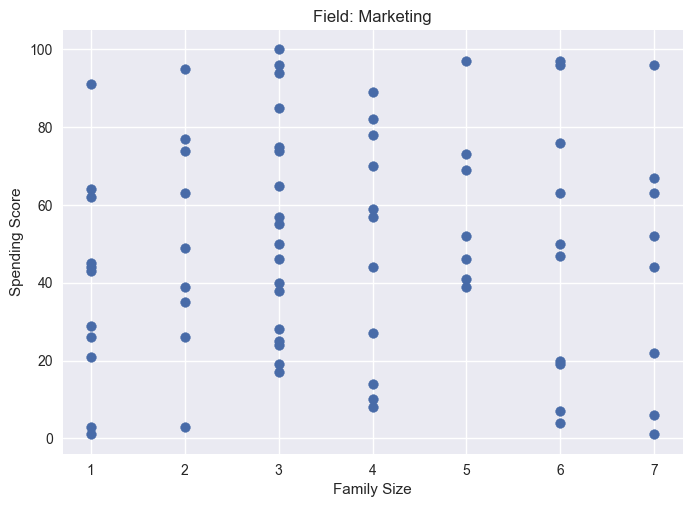

In [65]:
for i in profession:
    print(i)
    x=df[(df["Profession"]==i) & (df["Work Experience"]<10)]["Spending Score (1-100)"]
    y=df[(df["Profession"]==i) & (df["Work Experience"]<10)]["Family Size"]
    plt.scatter(y,x,color="#486BA8")
    plt.style.use("seaborn-v0_8")
    plt.grid(True)
    plt.title(f"Field: {i}")
    plt.xlabel("Family Size")
    plt.ylabel("Spending Score")
    plt.show()


#### Finding: For median spending score, the entertainment industry had a slightly better percentage

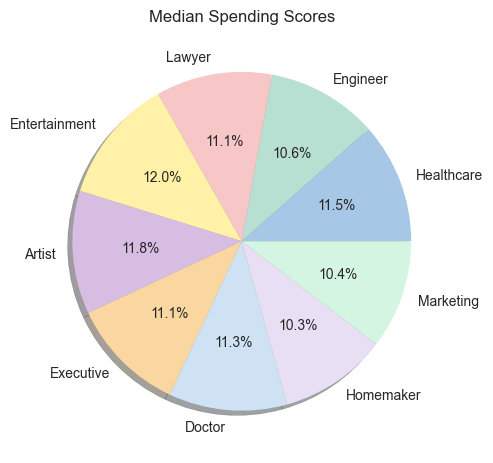

In [59]:
stack=[]
med=[]
for i in profession:
    temp=[]
    temp=list(df[df["Profession"]==i]["Spending Score (1-100)"])
    temp.sort()
    stack.append(temp)
    med.append(np.median(stack[-1]))

colors = ["#A7C7E7","#B8E0D2","#F7C6C7", "#FFF1A8", "#D7BDE2","#FAD7A0", "#CFE2F3","#E8DFF5",  
    "#D5F5E3"]
plt.pie(med, labels=profession, autopct="%1.1f%%", shadow=True, colors=colors)
plt.title("Median Spending Scores")
plt.show()

